In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from project import get_log_train_test_split, get_binned_train_test_split

In [2]:
data = pd.read_csv('Numerical_train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,3,65.0,8450,2,0,4,1,7,...,0,0,0,0,0,0,0,0,0,1
1,2,20,3,80.0,9600,2,0,4,1,6,...,0,0,0,0,0,0,0,0,0,1
2,3,60,3,68.0,11250,2,0,3,1,7,...,0,0,0,0,0,0,0,0,0,1
3,4,70,3,60.0,9550,2,0,3,1,7,...,0,0,0,0,0,0,0,0,0,1
4,5,60,3,84.0,14260,2,0,3,1,8,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X_train, X_test, y_train, y_test = get_log_train_test_split(data)

In [5]:
GBR = GradientBoostingRegressor(learning_rate= 0.1, n_estimators=1500, max_depth=2)

In [6]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
sorted(GBR.feature_importances_, reverse=True)[:10]

[0.35636302648612056,
 0.1653984699635373,
 0.04817968355546633,
 0.03945593996477545,
 0.03513800458640511,
 0.03416503464912105,
 0.03389660320625577,
 0.02779611694607377,
 0.022990383214932682,
 0.022015130471611306]

In [8]:
feature_importances = sorted(zip(X_train.columns, GBR.feature_importances_), reverse=True, key=lambda x: x[1])

In [9]:
feature_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

In [10]:
feature_df[:10]

,feature,importance
0,OverallQual,0.356363
1,GrLivArea,0.165398
2,TotalBsmtSF,0.048180
3,GarageCars,0.039456
4,GarageFinish,0.035138
5,ExterQual,0.034165
6,BsmtQual,0.033897
7,BsmtFinSF1,0.027796
8,1stFlrSF,0.022990
9,GarageArea,0.022015


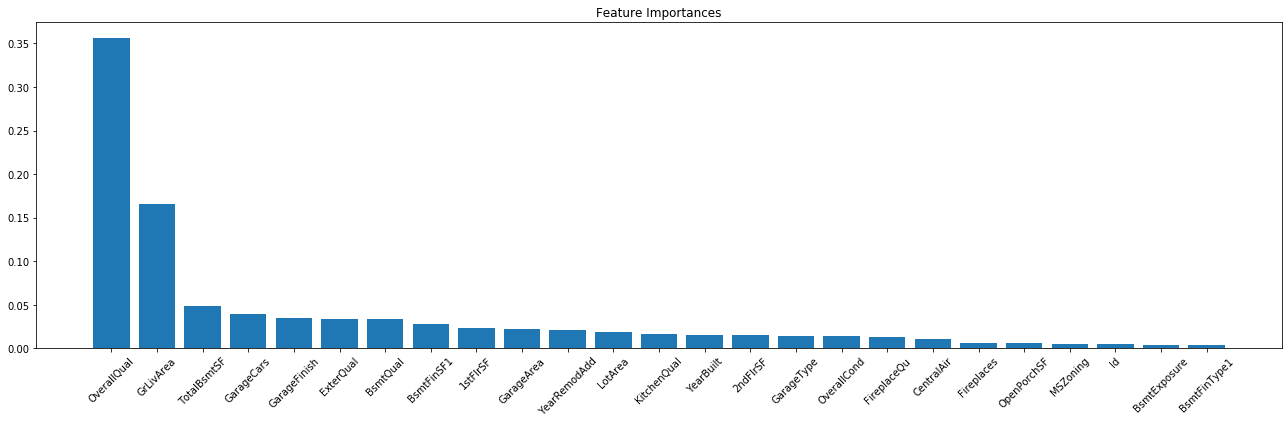

In [31]:
plt.figure(figsize=(18,6))
plt.bar(feature_df.feature[:25], feature_df.importance[:25])
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.tight_layout();

In [12]:
rf = RandomForestClassifier()

In [13]:
n_estimators = [100, 500, 1000, 1500]
max_depth = [2, 5, 10, 30, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5, 10] 

In [14]:
param_grid = dict(n_estimators = n_estimators,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf)

In [15]:
param_grid

{'n_estimators': [100, 500, 1000, 1500],
 'max_depth': [2, 5, 10, 30, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5, 10]}

In [16]:
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, cv=3)

In [17]:
X_train, X_test, y_train, y_test = get_binned_train_test_split(data)

In [18]:
#commenting this out because it takes long to run 
#rf_cv.fit(X_train, y_train)

In [19]:
#best_params = rf_cv.best_params_
best_params = {'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [20]:
rf = RandomForestClassifier(**best_params)

In [21]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rf.score(X_train, y_train)

0.9853085210577864

In [23]:
rf.score(X_test, y_test)

0.8561643835616438

In [24]:
list(feature_df.iloc[:6, 0].values) + ['SalePrice']

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageCars',
 'GarageFinish',
 'ExterQual',
 'SalePrice']

In [25]:
max_num_features = 31

In [26]:
train_scores = []
f1_macro = []
accuracy = []
recall = []
precision = []

for num_features in range(1,max_num_features):
    features = list(feature_df.iloc[:num_features, 0].values) + ['SalePrice']
    data_partial = data.loc[:, features]
    X_train, X_test, y_train, y_test = get_binned_train_test_split(data_partial)
    rf = RandomForestClassifier(**best_params)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1_macro.append(f1_score(y_test, y_pred, average='macro'))
    accuracy.append(accuracy_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred, average='macro'))
    precision.append(precision_score(y_test, y_pred, average='macro'))
    train_scores.append(rf.score(X_train, y_train))

Text(0, 0.5, 'metric score %')

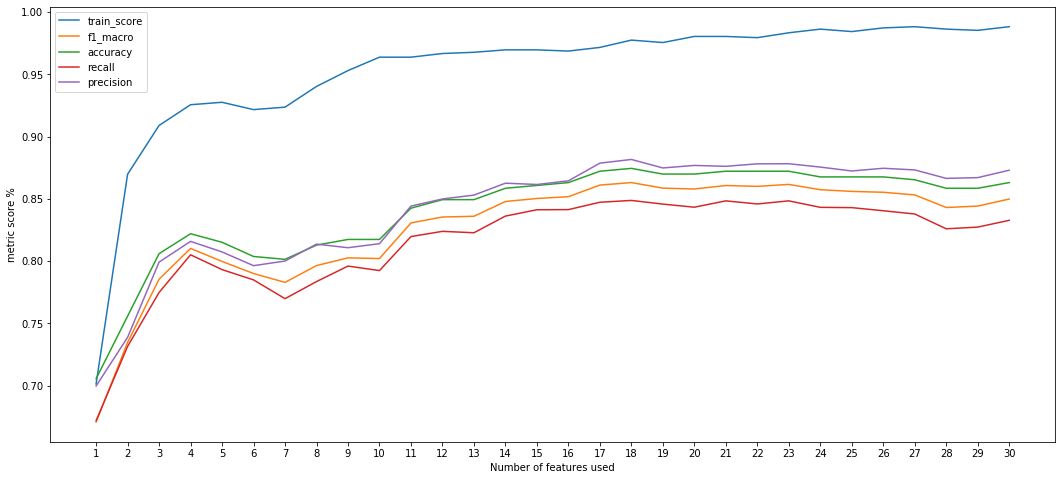

In [30]:
plt.figure(figsize=(18,8))
plt.plot(range(1, max_num_features), train_scores, label='train_score')
plt.plot(range(1, max_num_features), f1_macro, label='f1_macro')
plt.plot(range(1, max_num_features), accuracy, label='accuracy')
plt.plot(range(1, max_num_features), recall, label='recall')
plt.plot(range(1, max_num_features), precision, label='precision')
plt.xticks(range(1, max_num_features))
plt.legend()
plt.xlabel('Number of features used')
plt.ylabel('metric score %')

In [29]:
feature_df.iloc[:4, 0]

0    OverallQual
1      GrLivArea
2    TotalBsmtSF
3     GarageCars
Name: feature, dtype: object